In [ ]:
#Dataset link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [16]:
#pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [17]:
#pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
TrainDataSet = pd.read_csv("/Users/ganesh_dhasade/Documents/kaggle/House price prediction problem/House_Price_Prediction_Regression_Problem/Dataset/train.csv")
TestDataSet = pd.read_csv("/Users/ganesh_dhasade/Documents/kaggle/House price prediction problem/House_Price_Prediction_Regression_Problem/Dataset/test.csv")




In [4]:
TrainDataSet

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
TrainDataSet.shape


(1460, 81)

In [6]:
TestDataSet.shape

(1459, 80)

In [7]:
TrainDataSet.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [8]:
TestDataSet.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


In [9]:
cols = TrainDataSet.columns


In [10]:
cols

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
TrainDataSet.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
TestDataSet.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [13]:
#Replace null values of each columns

TrainDataSet['MSSubClass'].fillna((TrainDataSet['MSSubClass'].mean()), inplace=True)
TrainDataSet['MSZoning'].fillna("Unknown", inplace=True)
TrainDataSet['LotFrontage'].fillna((TrainDataSet['LotFrontage'].mean()), inplace=True)
TrainDataSet['LotArea'].fillna((TrainDataSet['LotArea'].mean()), inplace=True)
TrainDataSet['Street'].fillna("Unknown", inplace=True)
TrainDataSet['Alley'].fillna("Unknown", inplace=True)
TrainDataSet['LotShape'].fillna("Unknown", inplace=True)
TrainDataSet['LandContour'].fillna("Unknown", inplace=True)
TrainDataSet['Utilities'].fillna("Unknown", inplace=True)
TrainDataSet['LotConfig'].fillna("Unknown", inplace=True)
TrainDataSet['LandSlope'].fillna("Unknown", inplace=True)
TrainDataSet['Neighborhood'].fillna("Unknown", inplace=True)
TrainDataSet['Condition1'].fillna("Unknown", inplace=True)
TrainDataSet['Condition2'].fillna("Unknown", inplace=True)
TrainDataSet['BldgType'].fillna("Unknown", inplace=True)
TrainDataSet['HouseStyle'].fillna("Unknown", inplace=True)
TrainDataSet['OverallQual'].fillna((TrainDataSet['OverallQual'].mean()), inplace=True)
TrainDataSet['OverallCond'].fillna((TrainDataSet['OverallCond'].mean()), inplace=True)
TrainDataSet['RoofStyle'].fillna("Unknown", inplace=True)
TrainDataSet['RoofMatl'].fillna("Unknown", inplace=True)
TrainDataSet['Exterior1st'].fillna("Unknown", inplace=True)
TrainDataSet['Exterior2nd'].fillna("Unknown", inplace=True)
TrainDataSet['MasVnrType'].fillna("Unknown", inplace=True)
TrainDataSet['MasVnrArea'].fillna((TrainDataSet['MasVnrArea'].mean()), inplace=True)
TrainDataSet['ExterQual'].fillna("Unknown", inplace=True)
TrainDataSet['ExterCond'].fillna("Unknown", inplace=True)
TrainDataSet['Foundation'].fillna("Unknown", inplace=True)
TrainDataSet['BsmtQual'].fillna("Unknown", inplace=True)
TrainDataSet['BsmtCond'].fillna("Unknown", inplace=True)
TrainDataSet['BsmtExposure'].fillna("Unknown", inplace=True)
TrainDataSet['BsmtFinType1'].fillna("Unknown", inplace=True)
TrainDataSet['BsmtFinSF1'].fillna((TrainDataSet['BsmtFinSF1'].mean()), inplace=True)
TrainDataSet['BsmtFinType2'].fillna("Unknown", inplace=True)
TrainDataSet['BsmtFinSF2'].fillna((TrainDataSet['BsmtFinSF2'].mean()), inplace=True)
TrainDataSet['BsmtUnfSF'].fillna((TrainDataSet['BsmtUnfSF'].mean()), inplace=True)
TrainDataSet['TotalBsmtSF'].fillna((TrainDataSet['TotalBsmtSF'].mean()), inplace=True)
TrainDataSet['Heating'].fillna("Unknown", inplace=True)
TrainDataSet['HeatingQC'].fillna("Unknown", inplace=True)
TrainDataSet['CentralAir'].fillna("Unknown", inplace=True)
TrainDataSet['Electrical'].fillna("Unknown", inplace=True)
TrainDataSet['1stFlrSF'].fillna((TrainDataSet['1stFlrSF'].mean()), inplace=True)
TrainDataSet['2ndFlrSF'].fillna((TrainDataSet['2ndFlrSF'].mean()), inplace=True)
TrainDataSet['LowQualFinSF'].fillna((TrainDataSet['LowQualFinSF'].mean()), inplace=True)
TrainDataSet['GrLivArea'].fillna((TrainDataSet['GrLivArea'].mean()), inplace=True)
TrainDataSet['BsmtFullBath'].fillna((TrainDataSet['BsmtFullBath'].mean()), inplace=True)
TrainDataSet['BsmtHalfBath'].fillna((TrainDataSet['BsmtHalfBath'].mean()), inplace=True)
TrainDataSet['FullBath'].fillna((TrainDataSet['FullBath'].mean()), inplace=True)
TrainDataSet['HalfBath'].fillna((TrainDataSet['HalfBath'].mean()), inplace=True)
TrainDataSet['BedroomAbvGr'].fillna((TrainDataSet['BedroomAbvGr'].mean()), inplace=True)
TrainDataSet['KitchenAbvGr'].fillna((TrainDataSet['KitchenAbvGr'].mean()), inplace=True)
TrainDataSet['KitchenQual'].fillna("Unknown", inplace=True)
TrainDataSet['TotRmsAbvGrd'].fillna((TrainDataSet['TotRmsAbvGrd'].mean()), inplace=True)
TrainDataSet['Functional'].fillna("Unknown", inplace=True)
TrainDataSet['Fireplaces'].fillna((TrainDataSet['Fireplaces'].mean()), inplace=True)
TrainDataSet['FireplaceQu'].fillna("Unknown", inplace=True)
TrainDataSet['GarageType'].fillna("Unknown", inplace=True)
TrainDataSet['GarageYrBlt'].fillna((TrainDataSet['GarageYrBlt'].mean()), inplace=True)
TrainDataSet['GarageFinish'].fillna("Unknown", inplace=True)
TrainDataSet['GarageCars'].fillna((TrainDataSet['GarageCars'].mean()), inplace=True)
TrainDataSet['GarageArea'].fillna((TrainDataSet['GarageArea'].mean()), inplace=True)
TrainDataSet['GarageQual'].fillna("Unknown", inplace=True)
TrainDataSet['GarageCond'].fillna("Unknown", inplace=True)
TrainDataSet['PavedDrive'].fillna("Unknown", inplace=True)
TrainDataSet['WoodDeckSF'].fillna((TrainDataSet['WoodDeckSF'].mean()), inplace=True)
TrainDataSet['OpenPorchSF'].fillna((TrainDataSet['OpenPorchSF'].mean()), inplace=True)
TrainDataSet['EnclosedPorch'].fillna((TrainDataSet['EnclosedPorch'].mean()), inplace=True)
TrainDataSet['3SsnPorch'].fillna((TrainDataSet['3SsnPorch'].mean()), inplace=True)
TrainDataSet['ScreenPorch'].fillna((TrainDataSet['ScreenPorch'].mean()), inplace=True)
TrainDataSet['PoolArea'].fillna((TrainDataSet['PoolArea'].mean()), inplace=True)
TrainDataSet['PoolQC'].fillna("Unknown", inplace=True)
TrainDataSet['Fence'].fillna("Unknown", inplace=True)
TrainDataSet['MiscFeature'].fillna("Unknown", inplace=True)
TrainDataSet['MiscVal'].fillna((TrainDataSet['MiscVal'].mean()), inplace=True)
TrainDataSet['SaleType'].fillna("Unknown", inplace=True)
TrainDataSet['SaleCondition'].fillna("Unknown", inplace=True)
TrainDataSet['SalePrice'].fillna((TrainDataSet['SalePrice'].mean()), inplace=True)

In [14]:
#Replace null values in test dataset
TestDataSet['MSSubClass'].fillna((TestDataSet['MSSubClass'].mean()), inplace=True)
TestDataSet['MSZoning'].fillna("Unknown", inplace=True)
TestDataSet['LotFrontage'].fillna((TestDataSet['LotFrontage'].mean()), inplace=True)
TestDataSet['LotArea'].fillna((TestDataSet['LotArea'].mean()), inplace=True)
TestDataSet['Street'].fillna("Unknown", inplace=True)
TestDataSet['Alley'].fillna("Unknown", inplace=True)
TestDataSet['LotShape'].fillna("Unknown", inplace=True)
TestDataSet['LandContour'].fillna("Unknown", inplace=True)
TestDataSet['Utilities'].fillna("Unknown", inplace=True)
TestDataSet['LotConfig'].fillna("Unknown", inplace=True)
TestDataSet['LandSlope'].fillna("Unknown", inplace=True)
TestDataSet['Neighborhood'].fillna("Unknown", inplace=True)
TestDataSet['Condition1'].fillna("Unknown", inplace=True)
TestDataSet['Condition2'].fillna("Unknown", inplace=True)
TestDataSet['BldgType'].fillna("Unknown", inplace=True)
TestDataSet['HouseStyle'].fillna("Unknown", inplace=True)
TestDataSet['OverallQual'].fillna((TestDataSet['OverallQual'].mean()), inplace=True)
TestDataSet['OverallCond'].fillna((TestDataSet['OverallCond'].mean()), inplace=True)
TestDataSet['RoofStyle'].fillna("Unknown", inplace=True)
TestDataSet['RoofMatl'].fillna("Unknown", inplace=True)
TestDataSet['Exterior1st'].fillna("Unknown", inplace=True)
TestDataSet['Exterior2nd'].fillna("Unknown", inplace=True)
TestDataSet['MasVnrType'].fillna("Unknown", inplace=True)
TestDataSet['MasVnrArea'].fillna((TestDataSet['MasVnrArea'].mean()), inplace=True)
TestDataSet['ExterQual'].fillna("Unknown", inplace=True)
TestDataSet['ExterCond'].fillna("Unknown", inplace=True)
TestDataSet['Foundation'].fillna("Unknown", inplace=True)
TestDataSet['BsmtQual'].fillna("Unknown", inplace=True)
TestDataSet['BsmtCond'].fillna("Unknown", inplace=True)
TestDataSet['BsmtExposure'].fillna("Unknown", inplace=True)
TestDataSet['BsmtFinType1'].fillna("Unknown", inplace=True)
TestDataSet['BsmtFinSF1'].fillna((TestDataSet['BsmtFinSF1'].mean()), inplace=True)
TestDataSet['BsmtFinType2'].fillna("Unknown", inplace=True)
TestDataSet['BsmtFinSF2'].fillna((TestDataSet['BsmtFinSF2'].mean()), inplace=True)
TestDataSet['BsmtUnfSF'].fillna((TestDataSet['BsmtUnfSF'].mean()), inplace=True)
TestDataSet['TotalBsmtSF'].fillna((TestDataSet['TotalBsmtSF'].mean()), inplace=True)
TestDataSet['Heating'].fillna("Unknown", inplace=True)
TestDataSet['HeatingQC'].fillna("Unknown", inplace=True)
TestDataSet['CentralAir'].fillna("Unknown", inplace=True)
TestDataSet['Electrical'].fillna("Unknown", inplace=True)
TestDataSet['1stFlrSF'].fillna((TestDataSet['1stFlrSF'].mean()), inplace=True)
TestDataSet['2ndFlrSF'].fillna((TestDataSet['2ndFlrSF'].mean()), inplace=True)
TestDataSet['LowQualFinSF'].fillna((TestDataSet['LowQualFinSF'].mean()), inplace=True)
TestDataSet['GrLivArea'].fillna((TestDataSet['GrLivArea'].mean()), inplace=True)
TestDataSet['BsmtFullBath'].fillna((TestDataSet['BsmtFullBath'].mean()), inplace=True)
TestDataSet['BsmtHalfBath'].fillna((TestDataSet['BsmtHalfBath'].mean()), inplace=True)
TestDataSet['FullBath'].fillna((TestDataSet['FullBath'].mean()), inplace=True)
TestDataSet['HalfBath'].fillna((TestDataSet['HalfBath'].mean()), inplace=True)
TestDataSet['BedroomAbvGr'].fillna((TestDataSet['BedroomAbvGr'].mean()), inplace=True)
TestDataSet['KitchenAbvGr'].fillna((TestDataSet['KitchenAbvGr'].mean()), inplace=True)
TestDataSet['KitchenQual'].fillna("Unknown", inplace=True)
TestDataSet['TotRmsAbvGrd'].fillna((TestDataSet['TotRmsAbvGrd'].mean()), inplace=True)
TestDataSet['Functional'].fillna("Unknown", inplace=True)
TestDataSet['Fireplaces'].fillna((TestDataSet['Fireplaces'].mean()), inplace=True)
TestDataSet['FireplaceQu'].fillna("Unknown", inplace=True)
TestDataSet['GarageType'].fillna("Unknown", inplace=True)
TestDataSet['GarageYrBlt'].fillna((TestDataSet['GarageYrBlt'].mean()), inplace=True)
TestDataSet['GarageFinish'].fillna("Unknown", inplace=True)
TestDataSet['GarageCars'].fillna((TestDataSet['GarageCars'].mean()), inplace=True)
TestDataSet['GarageArea'].fillna((TestDataSet['GarageArea'].mean()), inplace=True)
TestDataSet['GarageQual'].fillna("Unknown", inplace=True)
TestDataSet['GarageCond'].fillna("Unknown", inplace=True)
TestDataSet['PavedDrive'].fillna("Unknown", inplace=True)
TestDataSet['WoodDeckSF'].fillna((TestDataSet['WoodDeckSF'].mean()), inplace=True)
TestDataSet['OpenPorchSF'].fillna((TestDataSet['OpenPorchSF'].mean()), inplace=True)
TestDataSet['EnclosedPorch'].fillna((TestDataSet['EnclosedPorch'].mean()), inplace=True)
TestDataSet['3SsnPorch'].fillna((TestDataSet['3SsnPorch'].mean()), inplace=True)
TestDataSet['ScreenPorch'].fillna((TestDataSet['ScreenPorch'].mean()), inplace=True)
TestDataSet['PoolArea'].fillna((TestDataSet['PoolArea'].mean()), inplace=True)
TestDataSet['PoolQC'].fillna("Unknown", inplace=True)
TestDataSet['Fence'].fillna("Unknown", inplace=True)
TestDataSet['MiscFeature'].fillna("Unknown", inplace=True)
TestDataSet['MiscVal'].fillna((TestDataSet['MiscVal'].mean()), inplace=True)
TestDataSet['SaleType'].fillna("Unknown", inplace=True)
TestDataSet['SaleCondition'].fillna("Unknown", inplace=True)


In [15]:
#Check null values for date colums to calculate how old property is
TrainDataSet[['YearBuilt', 'YearRemodAdd','MoSold', 'YrSold','GarageYrBlt']].isnull().sum()
TestDataSet[['YearBuilt', 'YearRemodAdd','MoSold', 'YrSold','GarageYrBlt']].isnull().sum()

YearBuilt       0
YearRemodAdd    0
MoSold          0
YrSold          0
GarageYrBlt     0
dtype: int64

In [16]:
TrainDataSet[['YearBuilt', 'YearRemodAdd','MoSold', 'YrSold','GarageYrBlt']]

,YearBuilt,YearRemodAdd,MoSold,YrSold,GarageYrBlt
0,2003,2003,2,2008,2003.0
1,1976,1976,5,2007,1976.0
2,2001,2002,9,2008,2001.0
3,1915,1970,2,2006,1998.0
4,2000,2000,12,2008,2000.0
...,...,...,...,...,...
1455,1999,2000,8,2007,1999.0
1456,1978,1988,2,2010,1978.0
1457,1941,2006,5,2010,1941.0
1458,1950,1996,4,2010,1950.0


In [17]:
#Replace years date with number in TrainDataSet
#Add col to dataset as current year
TrainDataSet['Current Year']=2020
#Calculate how old property use YearBuilt col--> Property_Age
TrainDataSet['Property_Age']=TrainDataSet['Current Year']- TrainDataSet['YearBuilt']

#Calculate last renovated use YearRemodAdd--> Last_Renovation
TrainDataSet['Last_Renovation']=TrainDataSet['Current Year']- TrainDataSet['YearRemodAdd']

#Last sold time use Sold_Date col --> Last_Sold
TrainDataSet['Last_Sold']=TrainDataSet['Current Year']- TrainDataSet['YrSold']

#Garage age use GarageYrBlt --> Garage_Age
TrainDataSet['Garage_Age']=TrainDataSet['Current Year']- TrainDataSet['GarageYrBlt']

In [18]:
#Replace years date with number in TestDataSet
#Add col to dataset as current year
TestDataSet['Current Year']=2020
#Calculate how old property use YearBuilt col--> Property_Age
TestDataSet['Property_Age']=TestDataSet['Current Year']- TrainDataSet['YearBuilt']

#Calculate last renovated use YearRemodAdd--> Last_Renovation
TestDataSet['Last_Renovation']=TestDataSet['Current Year']- TestDataSet['YearRemodAdd']

#Last sold time use Sold_Date col --> Last_Sold
TestDataSet['Last_Sold']=TestDataSet['Current Year']- TestDataSet['YrSold']

#Garage age use GarageYrBlt --> Garage_Age
TestDataSet['Garage_Age']=TestDataSet['Current Year']- TestDataSet['GarageYrBlt']

In [19]:
TestDataSet[['Property_Age','Last_Renovation','Last_Sold','Garage_Age']]

,Property_Age,Last_Renovation,Last_Sold,Garage_Age
0,17.0,59,10,59.000000
1,44.0,62,10,62.000000
2,19.0,22,10,23.000000
3,105.0,22,10,22.000000
4,20.0,28,10,28.000000
...,...,...,...,...
1454,16.0,50,14,42.278783
1455,21.0,50,14,50.000000
1456,42.0,24,14,60.000000
1457,79.0,28,14,42.278783


In [20]:
#Now Drop those colums (YearBuilt, YearRemodAdd, YrSold, MoSold)
TrainDataSet.drop(['YearBuilt','YearRemodAdd','YrSold', 'MoSold','GarageYrBlt'],axis=1,inplace=True)
TestDataSet.drop(['YearBuilt','YearRemodAdd','YrSold', 'MoSold','GarageYrBlt'],axis=1,inplace=True)

In [21]:
TrainDataSet.shape

(1460, 81)

In [22]:
TestDataSet.shape

(1459, 80)

In [23]:
#Now create Dummies for categorical columns
TrainDataSet=pd.get_dummies(TrainDataSet,drop_first=True)
TestDataSet=pd.get_dummies(TestDataSet,drop_first=True)

In [24]:
TrainDataSet.shape 

(1460, 263)

In [25]:
TestDataSet.shape 

(1459, 250)

In [26]:
TrainDataSet.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=263)

In [27]:
TestDataSet.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_Unknown',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=250)

In [28]:
#Let's check the correlation between columns
#TrainDataSet.corr()

In [29]:
#pip install sklearn

In [30]:
#Take dependent vairable in y
y = TrainDataSet['SalePrice']

In [31]:
X = TrainDataSet

In [32]:
X = X.drop(['SalePrice','Id'],axis=1)

In [33]:
TrainDataSet.shape

(1460, 263)

In [34]:
X.shape

(1460, 261)

In [35]:
y.shape

(1460,)

In [36]:
#------------------Feature Selection---------------------------

In [37]:
#-----ensemble- ExtraTreeRegressor algo----

In [38]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

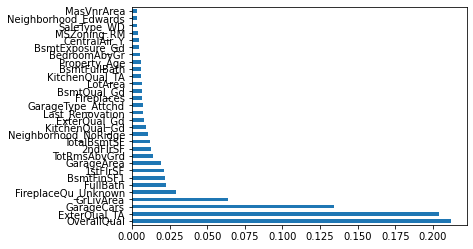

In [39]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [40]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances.nlargest(30))

OverallQual             0.211933
ExterQual_TA            0.204182
GarageCars              0.134269
GrLivArea               0.063686
FireplaceQu_Unknown     0.029277
FullBath                0.022481
BsmtFinSF1              0.021712
1stFlrSF                0.021272
GarageArea              0.019533
TotRmsAbvGrd            0.013890
2ndFlrSF                0.012685
TotalBsmtSF             0.012180
Neighborhood_NoRidge    0.010996
KitchenQual_Gd          0.009534
ExterQual_Gd            0.008009
Last_Renovation         0.007415
GarageType_Attchd       0.007128
Fireplaces              0.006863
BsmtQual_Gd             0.006818
LotArea                 0.006377
KitchenQual_TA          0.006331
BsmtFullBath            0.006032
Property_Age            0.005815
BedroomAbvGr            0.005582
BsmtExposure_Gd         0.004767
CentralAir_Y            0.004458
MSZoning_RM             0.004020
SaleType_WD             0.003457
Neighborhood_Edwards    0.003314
MasVnrArea              0.003138
dtype: flo

In [41]:
ETR_IV= X[['ExterQual_TA','OverallQual','GarageCars','GrLivArea','1stFlrSF','FireplaceQu_Unknown','FullBath','GarageArea','2ndFlrSF','TotalBsmtSF','BsmtFinSF1','TotRmsAbvGrd','KitchenQual_Gd','Neighborhood_NoRidge','LotArea','Last_Renovation','Fireplaces','BsmtQual_Gd','BsmtFullBath','KitchenQual_TA','GarageType_Attchd','BsmtExposure_Gd','BedroomAbvGr','Property_Age','CentralAir_Y','ExterQual_Gd','MSZoning_RM','MasVnrArea','GarageType_Detchd','SaleType_WD']]
ETR_DV = TrainDataSet['SalePrice']

ETR_TestDataSet= TestDataSet[['ExterQual_TA','OverallQual','GarageCars','GrLivArea','1stFlrSF','FireplaceQu_Unknown','FullBath','GarageArea','2ndFlrSF','TotalBsmtSF','BsmtFinSF1','TotRmsAbvGrd','KitchenQual_Gd','Neighborhood_NoRidge','LotArea','Last_Renovation','Fireplaces','BsmtQual_Gd','BsmtFullBath','KitchenQual_TA','GarageType_Attchd','BsmtExposure_Gd','BedroomAbvGr','Property_Age','CentralAir_Y','ExterQual_Gd','MSZoning_RM','MasVnrArea','GarageType_Detchd','SaleType_WD']]



In [42]:
#-----install xgboost--- and use to predict the feature
#conda install -c anaconda py-xgboost

In [43]:
#Take almost 15 mins
from xgboost import XGBClassifier
# Create an object instance for XGBClassifier class
model = XGBClassifier()
# Fit/Train the model
model.fit(X,y)
# Get the Feature Importance Score for all the features between 0 and 1
col = pd.DataFrame(X.columns, columns = ['col'])
feature = pd.DataFrame(model.feature_importances_,columns = ['feature'])
Feature_Importance = pd.concat([col,feature],axis=1)
Feature_Importance.sort_values(by=['feature'], inplace=True, ascending = False)

In [44]:
Sorted_Features = Feature_Importance[Feature_Importance['feature'] > 0.008] 
Sorted_Features['col']
#Feature_Importance['feature']

70     Neighborhood_NoRidge
228           GarageQual_TA
177        BsmtFinType1_LwQ
210          Functional_Typ
59     Neighborhood_ClearCr
171         BsmtExposure_Gd
58     Neighborhood_BrkSide
243           Fence_Unknown
120     Exterior1st_BrkFace
15             BsmtHalfBath
169             BsmtCond_TA
185        BsmtFinType2_Unf
220       GarageType_Detchd
38              MSZoning_RL
204          KitchenQual_TA
22               GarageCars
19             KitchenAbvGr
154            ExterCond_Fa
137     Exterior2nd_HdBoard
223        GarageFinish_Unf
21               Fireplaces
48          LandContour_Lvl
16                 FullBath
39              MSZoning_RM
Name: col, dtype: object

In [45]:
XGB_IV= X[['Neighborhood_NoRidge','GarageQual_TA','BsmtFinType1_LwQ','Functional_Typ','Neighborhood_ClearCr','BsmtExposure_Gd','Neighborhood_BrkSide','Fence_Unknown','Exterior1st_BrkFace','BsmtHalfBath','BsmtCond_TA','BsmtFinType2_Unf','GarageType_Detchd','MSZoning_RL','KitchenQual_TA','GarageCars','KitchenAbvGr','ExterCond_Fa','Exterior2nd_HdBoard','GarageFinish_Unf','Fireplaces','LandContour_Lvl','FullBath','MSZoning_RM']]
XGB_DV = TrainDataSet['SalePrice']
XGB_TestDataSet= TestDataSet[['Neighborhood_NoRidge','GarageQual_TA','BsmtFinType1_LwQ','Functional_Typ','Neighborhood_ClearCr','BsmtExposure_Gd','Neighborhood_BrkSide','Fence_Unknown','Exterior1st_BrkFace','BsmtHalfBath','BsmtCond_TA','BsmtFinType2_Unf','GarageType_Detchd','MSZoning_RL','KitchenQual_TA','GarageCars','KitchenAbvGr','ExterCond_Fa','Exterior2nd_HdBoard','GarageFinish_Unf','Fireplaces','LandContour_Lvl','FullBath','MSZoning_RM']]


In [46]:
#--------------Checking Training Accuracy with above extracted features -----------

In [47]:
#--------------1. Creating models for each feature extracted algorithms ----------

In [48]:
from sklearn.model_selection import train_test_split 
# Spliting the dataset as 80% Training & 20% Testing data using sklearn selection train_test_split function
#X_ETRTrain, X_ETRTest, Y_ETRTrain, Y_ETRTest = train_test_split(ETR_IV, ETR_DV, test_size = 0.20, random_state = 0)
#X_XGBTrain, X_XGBTest, Y_XGBTrain, Y_XGBTest = train_test_split(XGB_IV, XGB_DV, test_size = 0.20, random_state = 0)


In [49]:
#--------------2. Now train those created models -----------------

In [50]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [51]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [54]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [55]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [56]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)



In [57]:
rf_randomXGB = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [58]:
rf_random.fit(ETR_IV, ETR_DV)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [59]:
rf_randomXGB.fit(XGB_IV, XGB_DV)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   55.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [60]:
#Computing accuracy score of training Model-----------------

In [61]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [62]:
rf_randomXGB.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [63]:
rf_random.best_score_

-831581695.8969643

In [64]:
rf_randomXGB.best_score_

-1830608950.1288257

In [65]:
predictionsETR=rf_random.predict(ETR_TestDataSet)

In [66]:
predictionsXGB=rf_randomXGB.predict(XGB_TestDataSet)

In [67]:
predictionsETR

array([134740.332, 152464.543, 176494.287, ..., 162723.387, 110255.36 ,
       208179.566])

In [68]:
predictionsXGB

array([113847.85074218, 136821.76043735, 179673.05250518, ...,
       144053.38823732, 106829.27744155, 217426.81231383])

In [69]:
FinalResult = pd.DataFrame({"Id":TestDataSet.Id, "SalePrice":predictionsETR})
FinalResult.to_csv('/Users/ganesh_dhasade/Documents/kaggle/House price prediction problem/submission2.csv', index=False)

In [70]:
#--------------SVM--------

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(ETR_IV, ETR_DV)

In [ ]:
SVC = svclassifier.predict(TestDataSet)